# Figure 5

## set-up

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as clt
import TDAtools as TDAtl
import matplotlib.patches as patches

In [23]:
# Set up plot
fig = plt.figure(figsize = (18, 20))

gs0 = gridspec.GridSpec(2, 1, height_ratios=[3, 2], figure=fig)

gs00 = gridspec.GridSpecFromSubplotSpec(3, 4, subplot_spec=gs0[0], wspace=.1)
ax1 = [fig.add_subplot(gs00[0, 0]), fig.add_subplot(gs00[0, 1:3]), fig.add_subplot(gs00[0, 3])]
ax2 = [fig.add_subplot(gs00[1, 0]), fig.add_subplot(gs00[1, 1:3]), fig.add_subplot(gs00[1, 3])]
ax3 = [fig.add_subplot(gs00[2, 0]), fig.add_subplot(gs00[2, 1:3]), fig.add_subplot(gs00[2, 3])]

gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1], wspace=.1)
ax4 = [fig.add_subplot(gs01[0]), fig.add_subplot(gs01[1])]



In [24]:

# Parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 23}
title_text_params = {'fontweight': 'bold', 'fontsize': 23}
subtitle_text_params = {'fontsize': 20}


# Functions to beautify the ABM plots
def reposition_image(ax, right):
    position = ax.get_position().bounds
    if right:
        ax.set_position([position[0] + .01, position[1], .11, .11])
    else:
        ax.set_position([position[0] - .01, position[1] - .03, .11, .11])

    return None


def background_image(ax, right=True):
    rect = patches.FancyBboxPatch([2, 2], 20, 20, fill=True, alpha=.75, facecolor="gray", clip_on=False, zorder=0,
                                  boxstyle='round, pad=5')
    style = "Simple, tail_width=1, head_width=8, head_length=8"
    kw = dict(arrowstyle=style, color="gray", facecolor='gray', alpha=.5, linewidth=2)

    if not right:

        ax.add_patch(
            patches.FancyArrowPatch((25, 25), (41, 57), connectionstyle="arc3,rad=.7", **kw, clip_on=False, zorder=10))
        ax.add_patch(
            patches.FancyArrowPatch((25, 13), (42, 19), connectionstyle="arc3,rad=.7", **kw, clip_on=False, zorder=10))
        ax.add_patch(patches.FancyArrowPatch((25, 0), (42, -18), connectionstyle="arc3,rad=-0.1", **kw, clip_on=False,
                                             zorder=10))

    else:
        ax.add_patch(
            patches.FancyArrowPatch((-1, 25), (-11, 25), connectionstyle="arc3,rad=.6", **kw, clip_on=False, zorder=10))

    ax.add_patch(rect)

    return None


def plot_coral_image(ax, image, size=25, colors=('#EE8382', '#508991', '#172A3A')):
    # Parameters
    levels = [0, 1, 2]
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    return ax


# Style setup
sns.set_style("ticks")
colors = ['#EE8382', '#508991', '#172A3A']
success_palette = sns.set_palette(sns.color_palette(colors))
levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')


In [25]:
# Plot initial image

df = pd.read_csv(
    './output/25x25/grid0/grazing42/threshold145/coral33-macro33-r10-d40-a20-y75-time1010-rec10-nsim100.csv')
image = np.genfromtxt(
    [df[(df.timestep == 0) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
image = image.reshape((25, 25))

for x, ax_image in enumerate([ax1[0], ax2[0], ax3[0]]):

    ax_image.set_yticks([])
    ax_image.set_xticks([])
    ax_image.set_xticks(np.arange(-.5, 25, 1), minor=True)
    ax_image.set_yticks(np.arange(-.5, 25, 1), minor=True)
    ax_image.set_frame_on(False)
    ax_image.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    if x == 1:
        ax_image = plot_coral_image(ax_image, image)
        reposition_image(ax_image, right=False)
        background_image(ax_image, right=False)


<ipython-input-24-110a2d0f3e55>:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.FancyArrowPatch((25, 25), (41, 57), connectionstyle="arc3,rad=.7", **kw, clip_on=False, zorder=10))
<ipython-input-24-110a2d0f3e55>:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.FancyArrowPatch((25, 13), (42, 19), connectionstyle="arc3,rad=.7", **kw, clip_on=False, zorder=10))
<ipython-input-24-110a2d0f3e55>:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(patches.FancyArrowPatch((25, 0), (42, -18), connectionstyle="arc3,rad=-0.1", **kw, clip_on=False,


In [26]:
# Plot t=100 image

g_averages = []
g_range = ([.42, .53, .62])

for g, grazing in enumerate(g_range):

    df = pd.read_csv('./output/25x25/grid0/grazing' + str(int(round(100 * grazing))) +
                     '/threshold145/coral33-macro33-r10-d40-a20-y75-time1010-rec10-nsim100.csv')
    image = np.genfromtxt(
        [df[(df.timestep == 1000) & (df.simulation == 1)]['image'].values[0].replace('[', '').replace(']', '')])
    image = image.reshape((25, 25))

    # Plot t100 image 
    if g == 0:
        ax_image = ax1[-1]
    elif g == 1:
        ax_image = ax2[-1]
    else:
        ax_image = ax3[-1]

    ax_image = plot_coral_image(ax_image, image)

    reposition_image(ax_image, right=True)
    background_image(ax_image, right=True)


<ipython-input-24-110a2d0f3e55>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.FancyArrowPatch((-1, 25), (-11, 25), connectionstyle="arc3,rad=.6", **kw, clip_on=False, zorder=10))
<ipython-input-24-110a2d0f3e55>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.FancyArrowPatch((-1, 25), (-11, 25), connectionstyle="arc3,rad=.6", **kw, clip_on=False, zorder=10))
<ipython-input-24-110a2d0f3e55>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.FancyArrowPatch((-1, 25), (-11, 25), connectionstyle="arc3,rad=.6", **kw, clip_on=False, zorder=10))


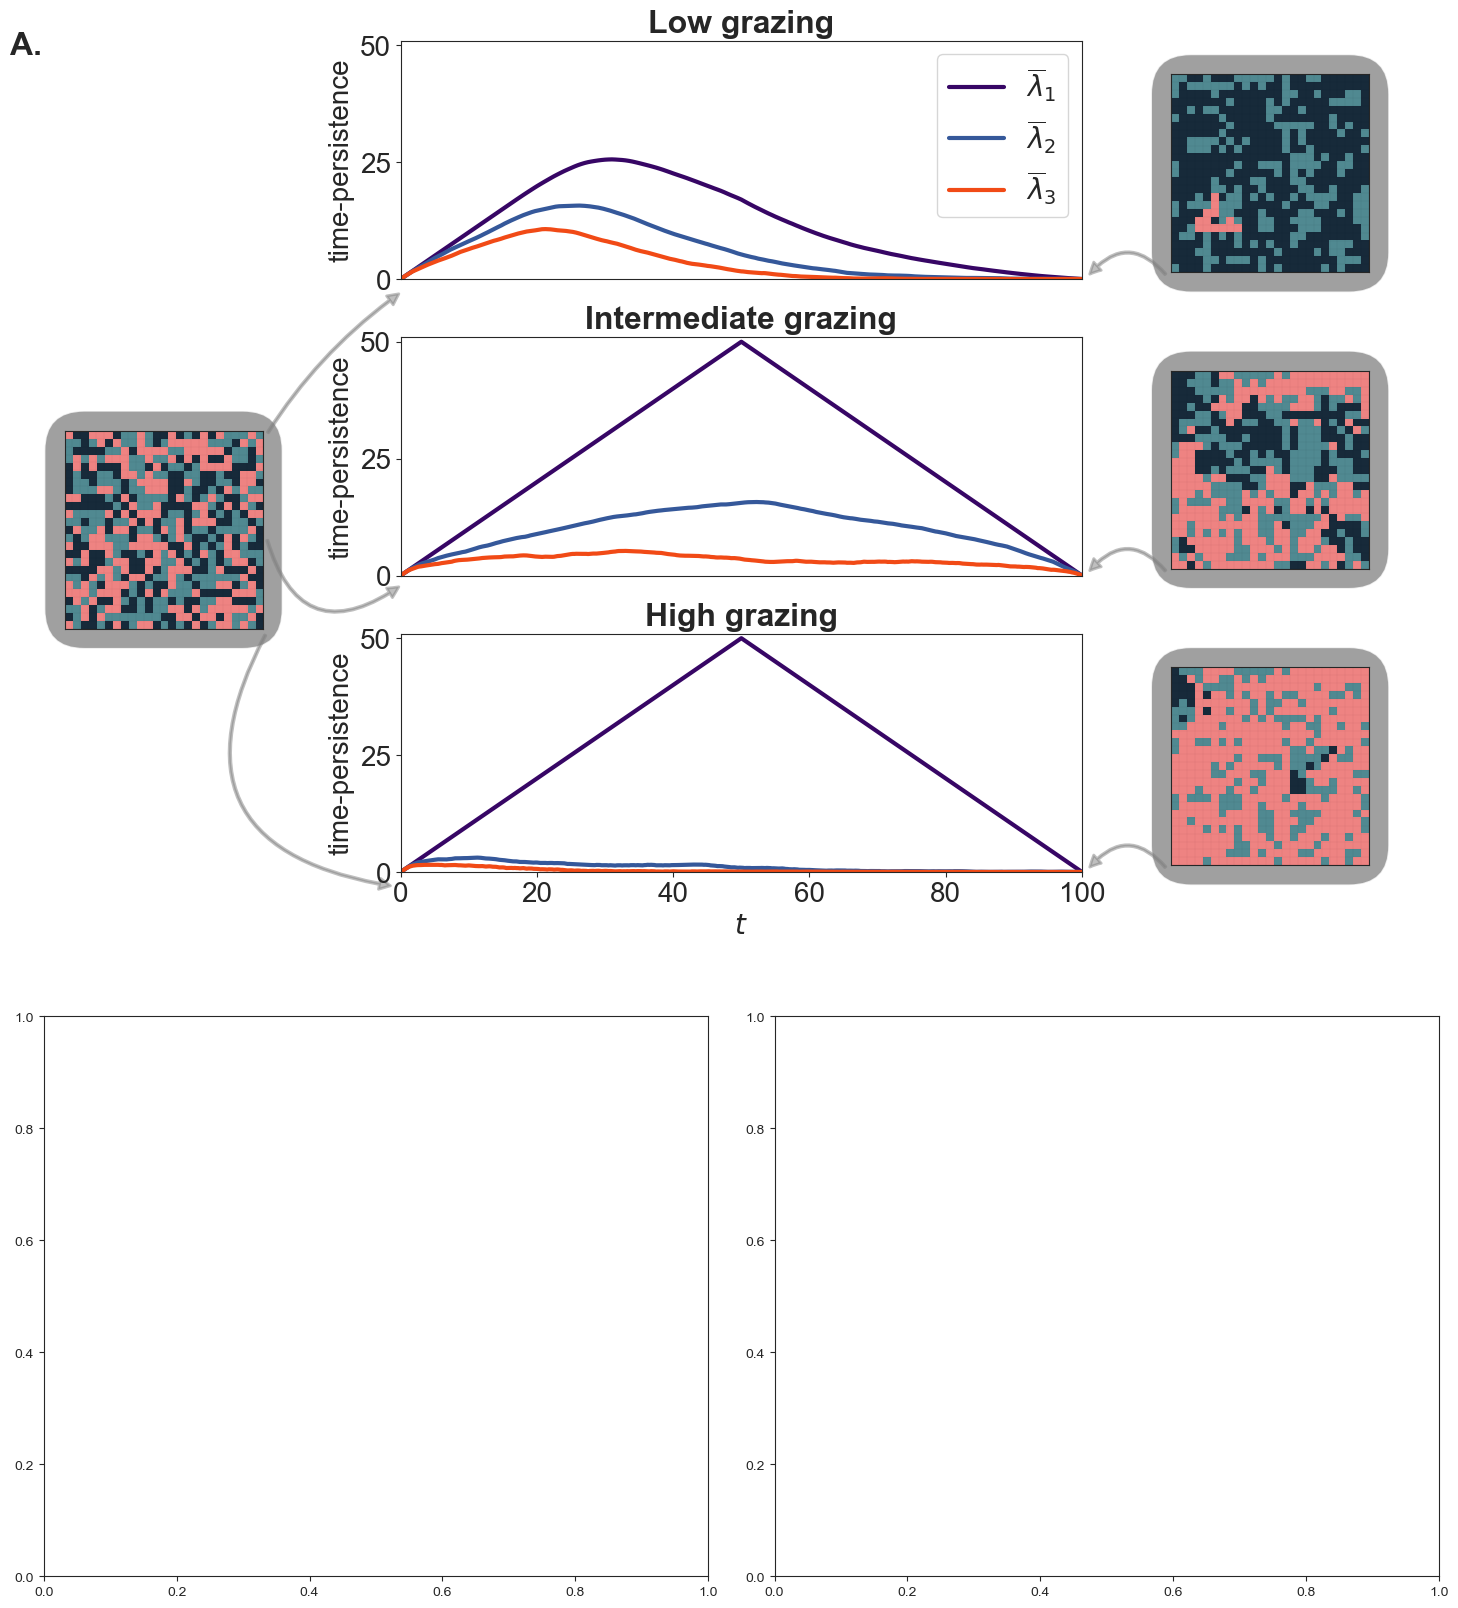

In [27]:

# Plot landscapes

# Parameters
landscape_colors = ['#370665', '#35589A', '#F14A16', '#FC9918']
labels = ['$\overline{\lambda}_1$', '$\overline{\lambda}_2$', '$\overline{\lambda}_3$']
titles = ['Low grazing', 'Intermediate grazing', 'High grazing']

lwidth = 3
xx = np.linspace(0, 160, 100)

# Plot landscapes for three different grazing levels
for g, grazing in enumerate(g_range):

    if g == 0:
        ax_landscape = ax1[1]
    elif g == 1:
        ax_landscape = ax2[1]
    else:
        ax_landscape = ax3[1]

    landscape_path = './output/25x25/grid0/grazing' + str(round(100 * grazing)) + '/threshold145/bars/average.land'
    landscape_cps = TDAtl.get_landscape_critical_points(landscape_path)
    for i in range(3):
        critical_points = np.array(landscape_cps[i])
        lines = ax_landscape.plot(critical_points[:, 0], critical_points[:, 1],
                                  color=landscape_colors[i % len(landscape_colors)], label=labels[i], linewidth=3,
                                  linestyle='solid')

    ax_landscape.set_xlim([0, 100])
    ax_landscape.set_ylabel('time-persistence', fontdict=subtitle_text_params)
    ax_landscape.set_ylim([0, 1 + 100 / 2])
    if g == 2:
        ax_landscape.set_xticks([0, 20, 40, 60, 80, 100])
        ax_landscape.set_xticklabels([0, 20, 40, 60, 80, 100], fontdict=subtitle_text_params)
        ax_landscape.set_xlabel('$t$', fontdict=subtitle_text_params)
    else:
        ax_landscape.set_xticks([])
        ax_landscape.set_xlabel('')

    if g == 0:
        ax_landscape.text(-55, 50, 'A.', ha='center', va='center', fontdict=heading_text_params)

    ax_landscape.set_yticks([0, 25, 50])
    ax_landscape.set_yticklabels([0, 25, 50], fontdict=subtitle_text_params)
    xleft, xright = ax_landscape.get_xlim()
    ybottom, ytop = ax_landscape.get_ylim()
    ax_landscape.set_aspect(abs((xright - xleft) / (ybottom - ytop)) * 0.35)
    ax_landscape.set_title(titles[g], fontdict=title_text_params)

    # Lambda on 1st plot
    if g == 0:
        ax_landscape.legend(loc='upper right', prop={'size': 20})
    ax_landscape.set_facecolor('none')

fig


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


<ipython-input-28-214d7c440757>:101: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4[0].set_yticklabels([int(L) for L in ax4[0].get_yticks()], fontdict=subtitle_text_params)


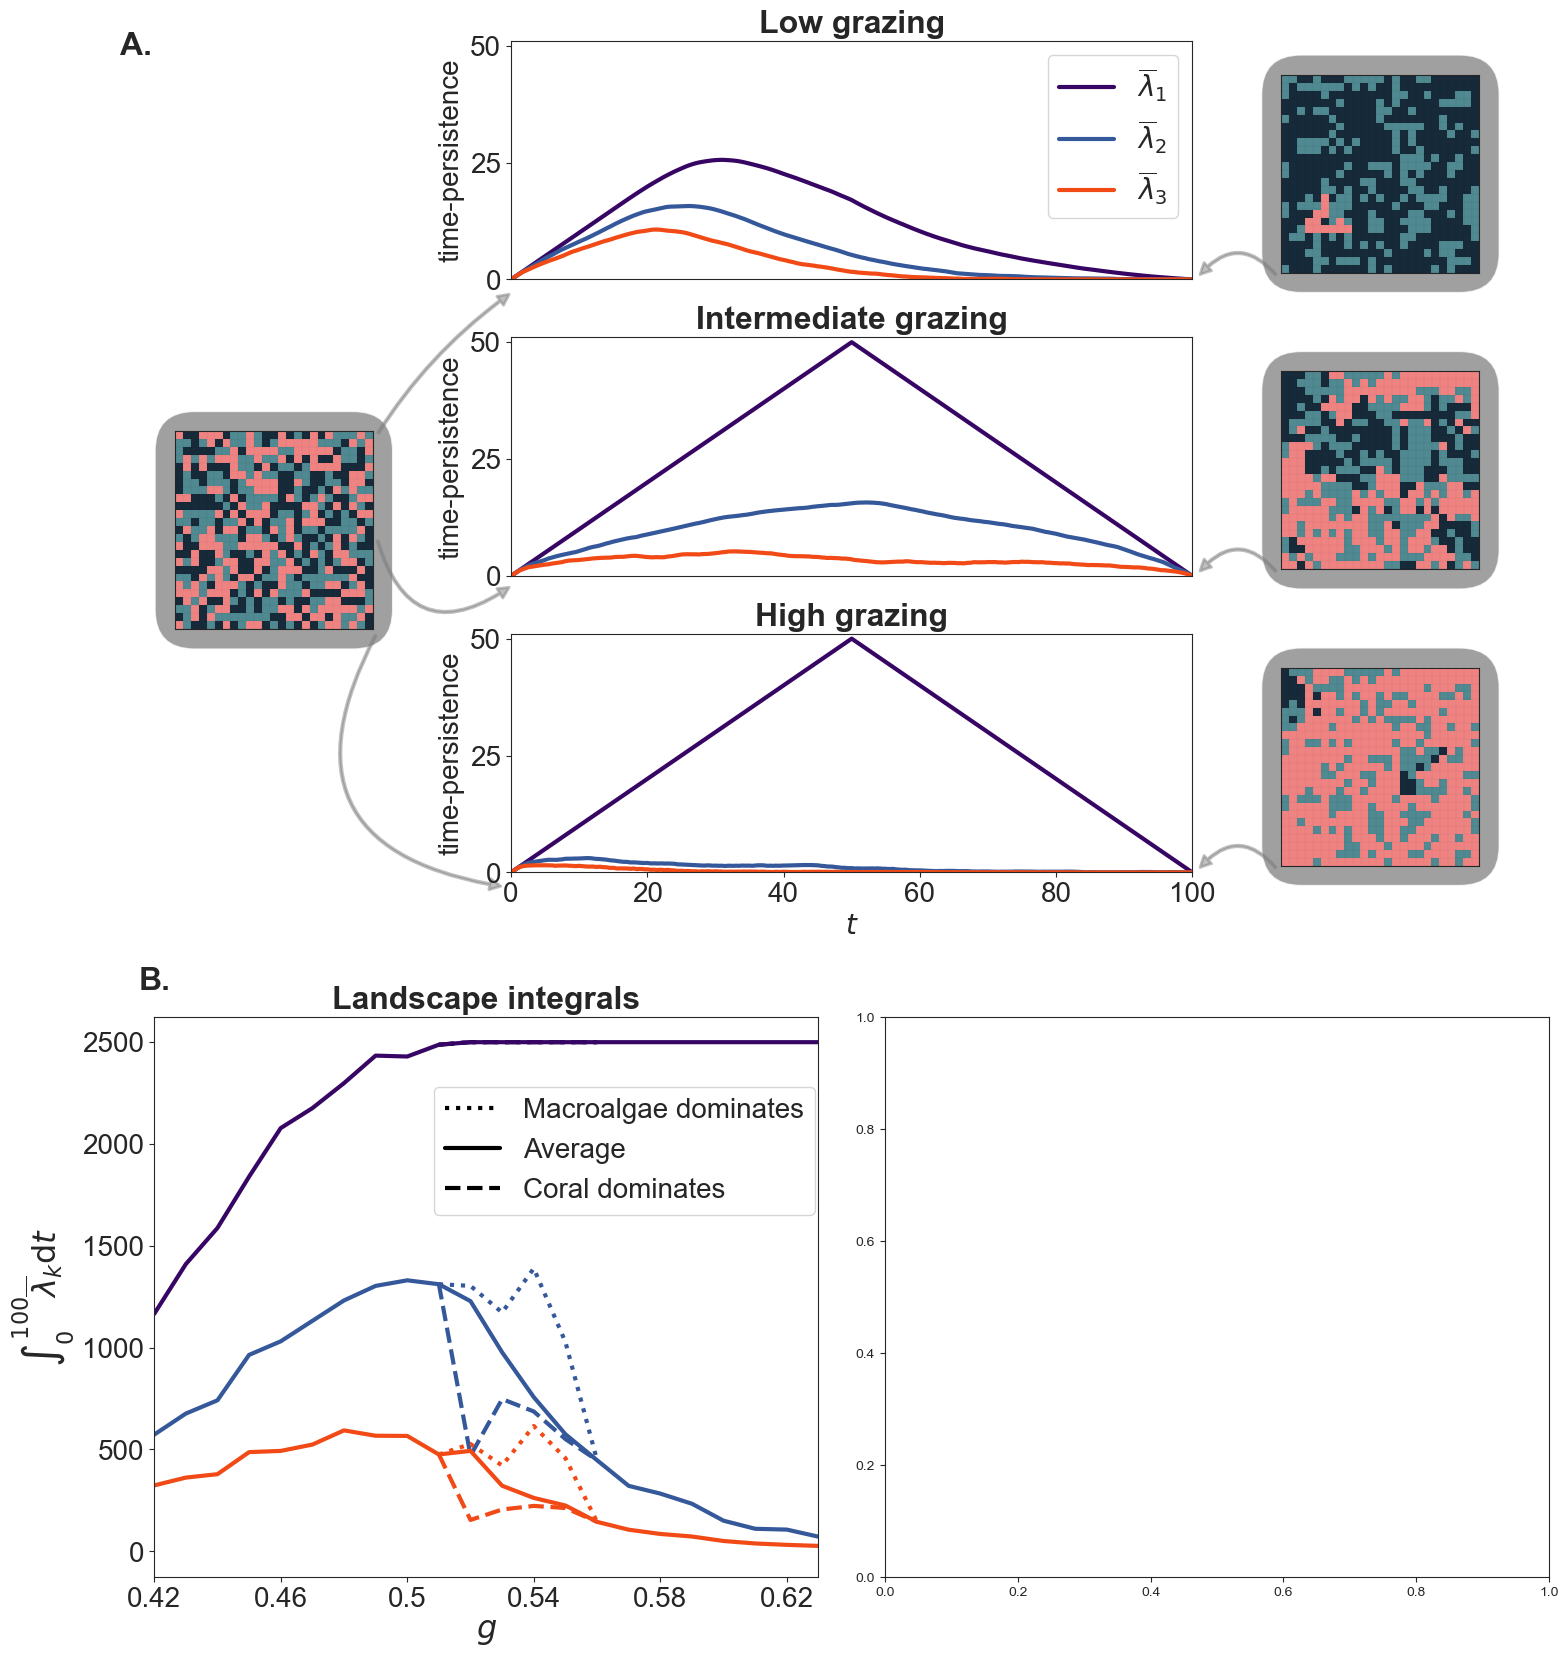

In [28]:

# Plot both species
range_here = [.42 + .01 * i for i in range(22)]
meta_range = [.52, .53, .54, .55]
n_landscapes = 3
n_sims = 100
species = ['macro', 'coral']
lstyle = ['dotted', 'dashed']

stat_averages = []
meta_averages = [[], []]

g_flag = 0

for gs in range(len(range_here)):
    print(gs)
    g = range_here[gs]

    path = './output/25x25/grid0/grazing' + str(round(g * 100)) + '/threshold145'

    coral_lands = np.loadtxt(
        path + '/bars/' + 'c' + str(int(100 * .33)) + 'm' + str(int(100 * .33)) + 'all_lands_list_hdim0.txt', dtype=str)

    # Compute integrals
    integrals = np.zeros((np.shape(coral_lands)[0], n_landscapes))
    for i in range(np.shape(coral_lands)[0]):  # cycle through all landscapes
        lan_filename = coral_lands[i]
        lan_file = open(lan_filename, 'r')
        landscapes = []
        LS = 0

        while LS <= n_landscapes:
            line = lan_file.readline()
 
            if len(line) == 0:
                LS = n_landscapes +1
                continue
            if LS == 0:
                LS = LS + 1
                this_landscape = []
            elif line[0] == "#":
                landscapes.append(this_landscape)
                LS = LS + 1
                this_landscape = []
            else:
                this_landscape.append(np.fromstring(line, dtype=float, sep='  '))
        for lamb in range(len(landscapes)):
            integrals[i][lamb] = TDAtl.integrate_landscape(landscapes[lamb])

    # Compute averages
    averages = []
    for lamb in range(n_landscapes):
        av = 0
        for sim in range(100):
            av += integrals[sim][lamb]

        averages.append(av / n_sims)
    stat_averages.append(averages)

    if g in meta_range:

        # Add in integral values either side of meta range
        if g_flag == 0:
            g_flag += 1
            meta_averages[0].append(stat_averages[-2])
            meta_averages[1].append(stat_averages[-2])

        for s, sp in enumerate(species):
            landscape_path = './output/25x25/grid0/grazing' + str(round(100 * g)) + '/threshold145/bars/' + species[
                s] + '_success/average.land'
            landscape_cps = TDAtl.get_landscape_critical_points(landscape_path)
            ints = []
            for i in range(3):
                critical_points = np.array(landscape_cps[i])
                ints.append(TDAtl.integrate_landscape(critical_points))
            meta_averages[s].append(ints)

    else:
        if g_flag == 1:
            g_flag += 1
            meta_averages[0].append(averages)
            meta_averages[1].append(averages)

# Do summary plot
for lamb in range(n_landscapes):
    # first plot averages
    line = [stat_averages[i][lamb] for i in range(len(range_here[:]))]
    ax4[0].plot(range_here, line, color=landscape_colors[lamb % len(landscape_colors)], linewidth=lwidth)

    # then plot split up
    line = [meta_averages[0][i][lamb] for i in range(2 + len(meta_range[:]))]
    extended_meta_range = [min(meta_range) - .01] + meta_range + [max(meta_range) + .01]
    ax4[0].plot(extended_meta_range, line, color=landscape_colors[lamb % len(landscape_colors)], linewidth=lwidth,
                linestyle=lstyle[0])
    line = [meta_averages[1][i][lamb] for i in range(2 + len(meta_range[:]))]
    ax4[0].plot(extended_meta_range, line, color=landscape_colors[lamb % len(landscape_colors)], linewidth=lwidth,
                linestyle=lstyle[1])

ax4[0].set_xlim([min(range_here), max(range_here)])
ax4[0].set_xticks([round(range_here[i], 2) for i in [0, 4, 8, 12, 16, 20]])
ax4[0].set_xticklabels(ax4[0].get_xticks(), fontdict=subtitle_text_params)
ax4[0].set_yticklabels([int(L) for L in ax4[0].get_yticks()], fontdict=subtitle_text_params)
ax4[0].set_title('Landscape integrals', fontdict=title_text_params)
ax4[0].set_ylabel('$\int_0^{100} \overline{\lambda}_k \mathrm{d}t$', fontdict=title_text_params)
ax4[0].set_xlabel('$g$', fontdict=title_text_params)

ax4[0].text(.42, 2800, 'B.', ha='center', va='center', fontdict=heading_text_params)
ax4[0].plot(0 * xx, 0 * xx, 'k', linestyle=lstyle[0], linewidth=lwidth, label='Macroalgae dominates')
ax4[0].plot(0 * xx, 0 * xx, 'k', linestyle='solid', linewidth=lwidth, label='Average')
ax4[0].plot(0 * xx, 0 * xx, 'k', linestyle=lstyle[1], linewidth=lwidth, label='Coral dominates')
ax4[0].legend(bbox_to_anchor=(.4, .9), prop={'size': 20})

#    ax_landscape.plot(0*xx, 0*xx, 'k', linestyle=lstyle[1], linewidth=lwidth, label='Coral dominates')

fig


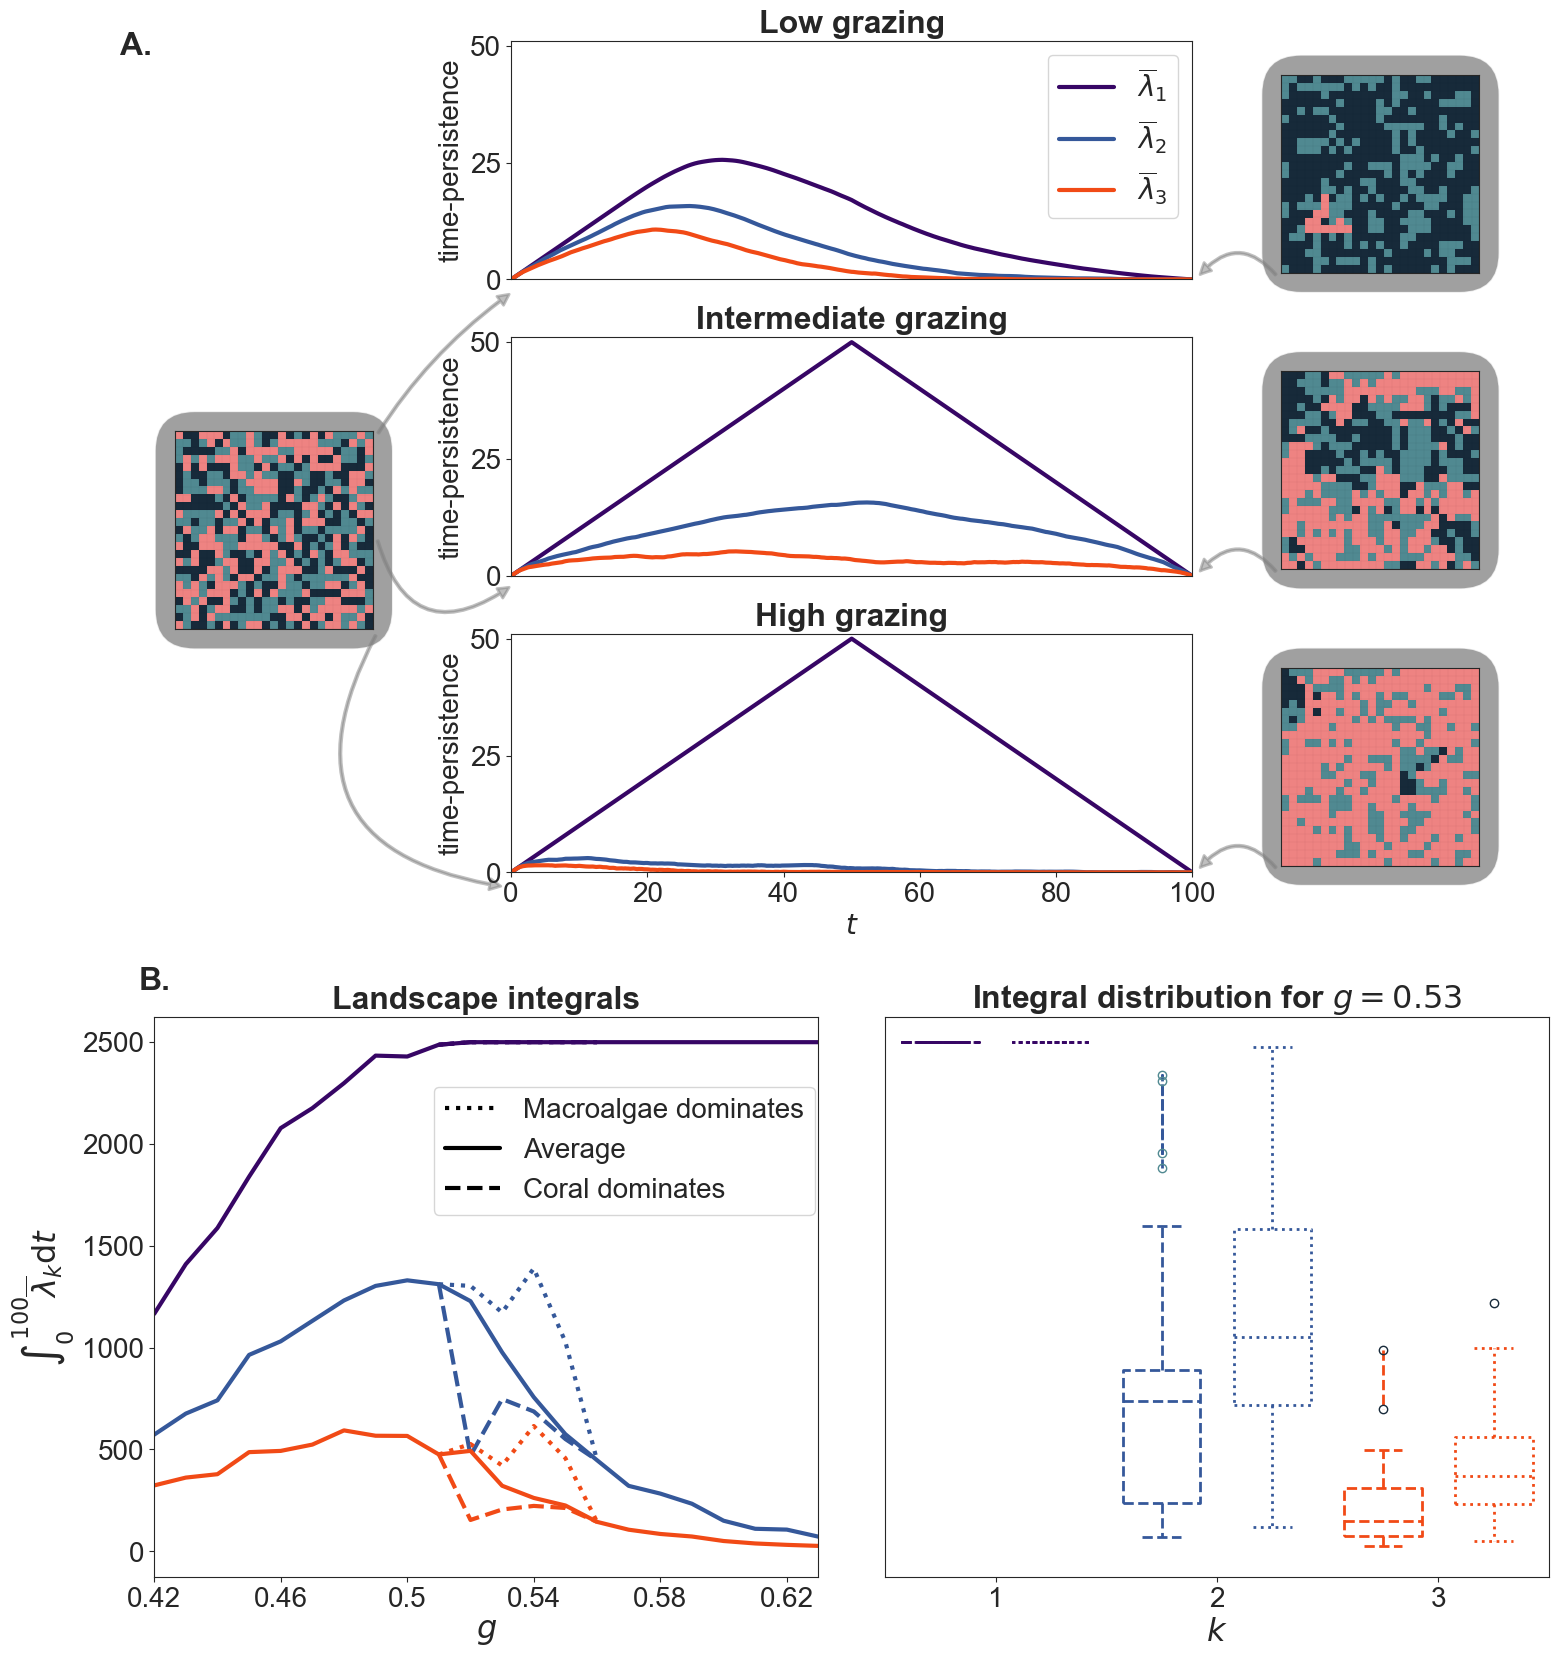

In [29]:

boxplot_g = 0.53
path = './output/25x25/grid0/grazing' + str(round(100 * boxplot_g)) + '/threshold145'

ax4[1].plot(0 * xx, 0 * xx, 'k', linestyle=lstyle[0], label='Macroalgae success')
ax4[1].plot(0 * xx, 0 * xx, 'k', linestyle=lstyle[1], label='Coral success')

# Plot both species
n_landscapes = 3
for s, sp in enumerate(species):

    coral_lands = np.loadtxt(
        path + '/bars/' + species[s] + '_success/c33m33' + species[s] + '_success_all_land_hdim0.txt', dtype=str)

    integrals = np.zeros((np.shape(coral_lands)[0], n_landscapes))
    for i in range(np.shape(coral_lands)[0]):  # cycle through all landscapes
        lan_filename = coral_lands[i]
        lan_file = open(lan_filename, 'r')
        landscapes = []
        LS = 0

        while LS <= n_landscapes:
            line = lan_file.readline()
            if len(line) == 0:
                LS = n_landscapes
                continue
            if LS == 0:
                LS = LS + 1
                this_landscape = []
            elif line[0] == "#":
                landscapes.append(this_landscape)
                LS = LS + 1
                this_landscape = []
            else:
                this_landscape.append(np.fromstring(line, dtype=float, sep='  '))
        for lamb in range(len(landscapes)):
            integrals[i][lamb] = TDAtl.integrate_landscape(landscapes[lamb])

    for lamb in range(n_landscapes):
        props = dict(linestyle=lstyle[s], linewidth=2, color=landscape_colors[lamb % len(landscape_colors)],
                     markeredgecolor=colors[lamb % len(colors)])
        ax4[1].boxplot(integrals[:, lamb], positions=[lamb + 1 + 0.25 * (-1) ** s], widths=0.35,
                       boxprops=props, medianprops=props, whiskerprops=props, capprops=props, flierprops=props,
                       manage_ticks=False)

ax4[1].set_xlim([0.5, n_landscapes + 0.5])
ax4[1].set_xticks(1 + np.arange(n_landscapes))
ax4[1].set_xticklabels(1 + np.arange(n_landscapes), fontdict=subtitle_text_params)  #
ax4[1].set_yticks([])
ax4[1].set_title('Integral distribution for $g=' + str(boxplot_g) + '$', fontdict=title_text_params)

ax4[1].set_xlabel('$k$', fontdict=title_text_params)
fig

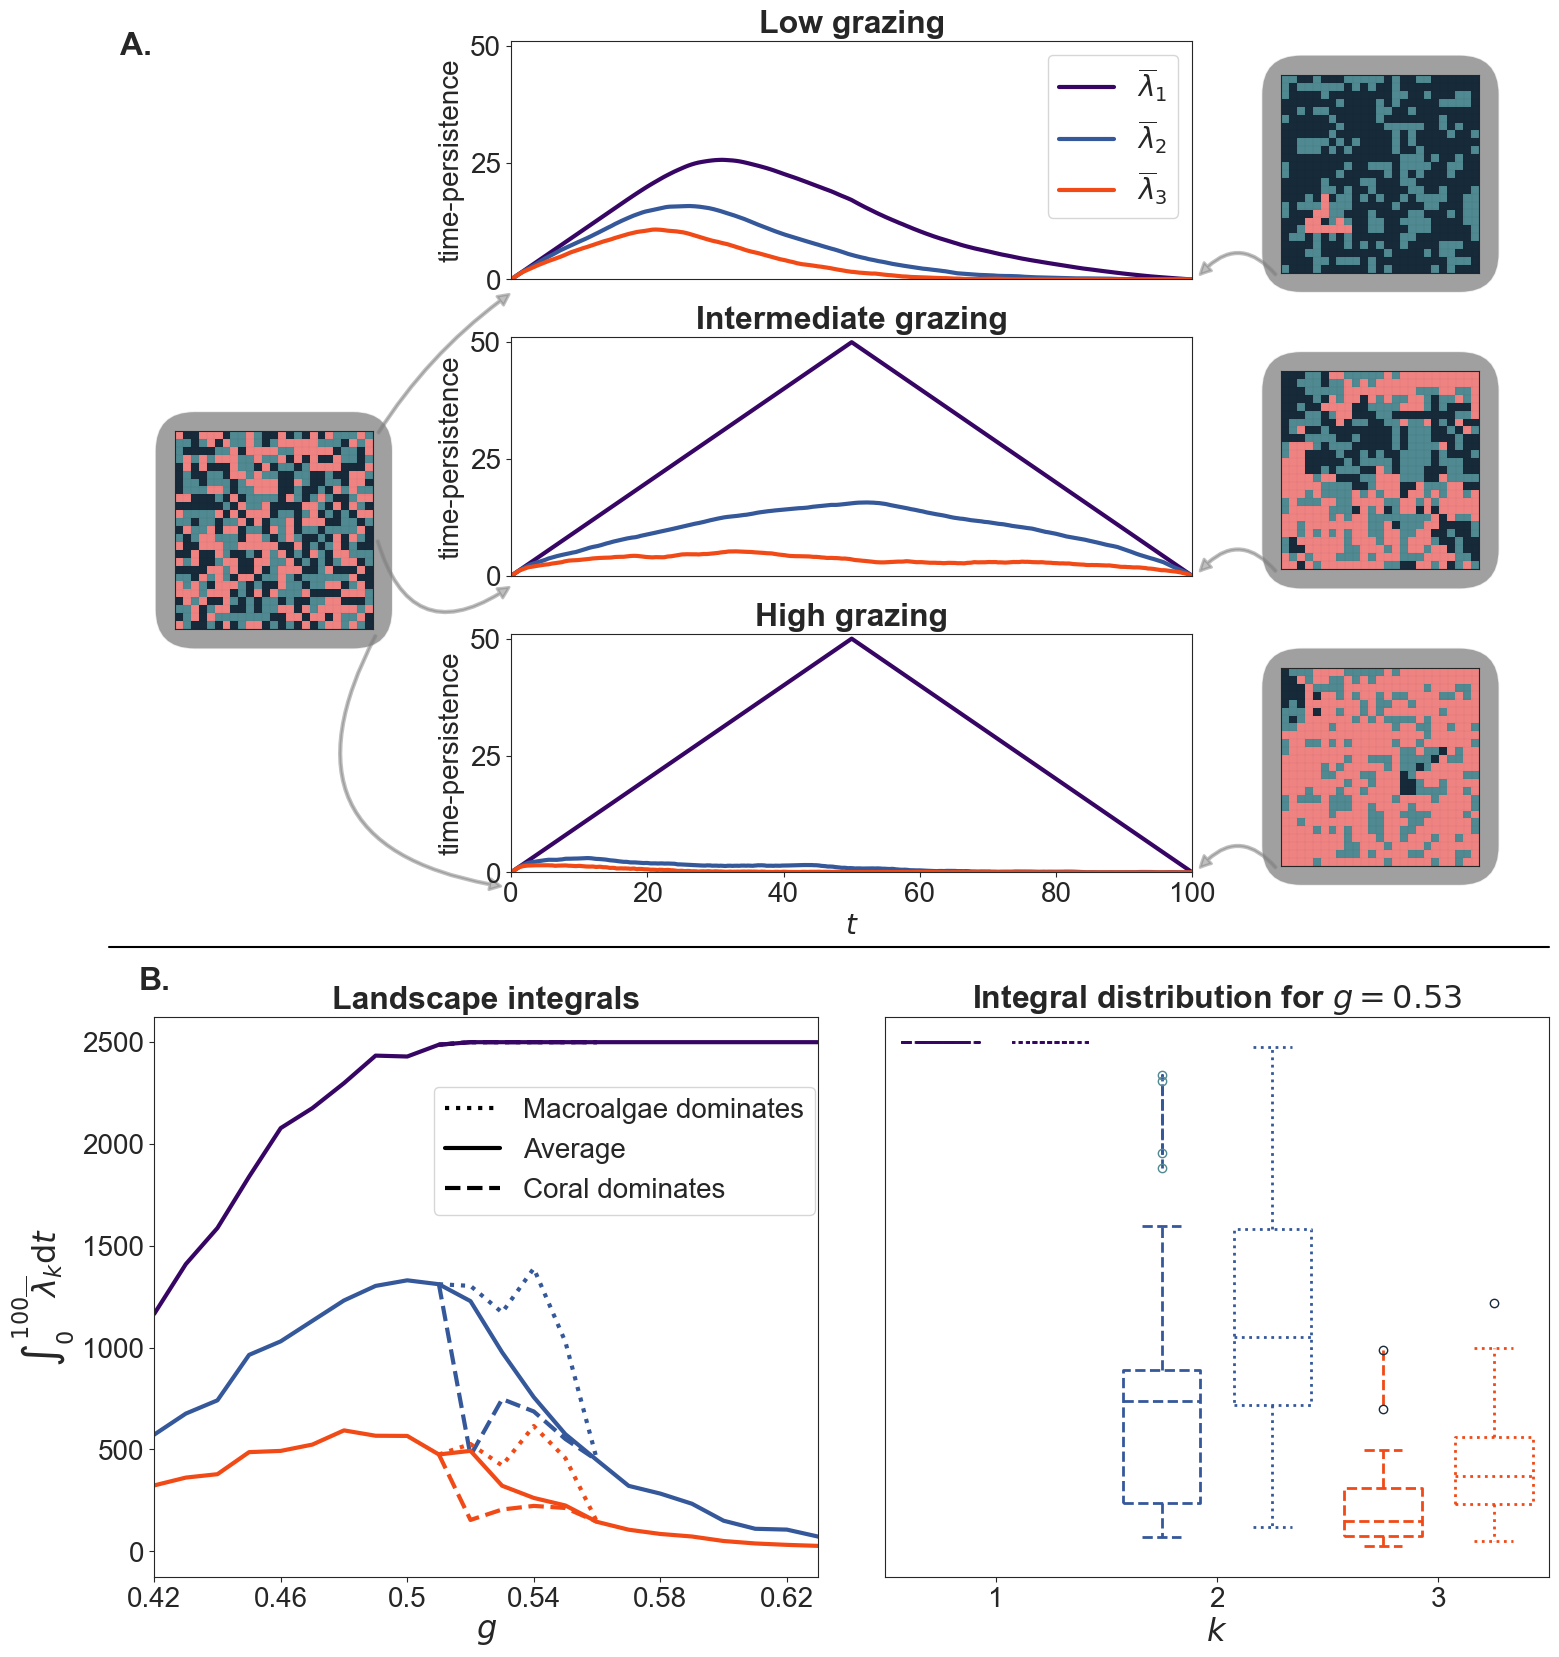

In [30]:
plot_line1 = plt.Line2D([.1, .9], [.425,.425], color="black")

fig.add_artist(plot_line1)
fig

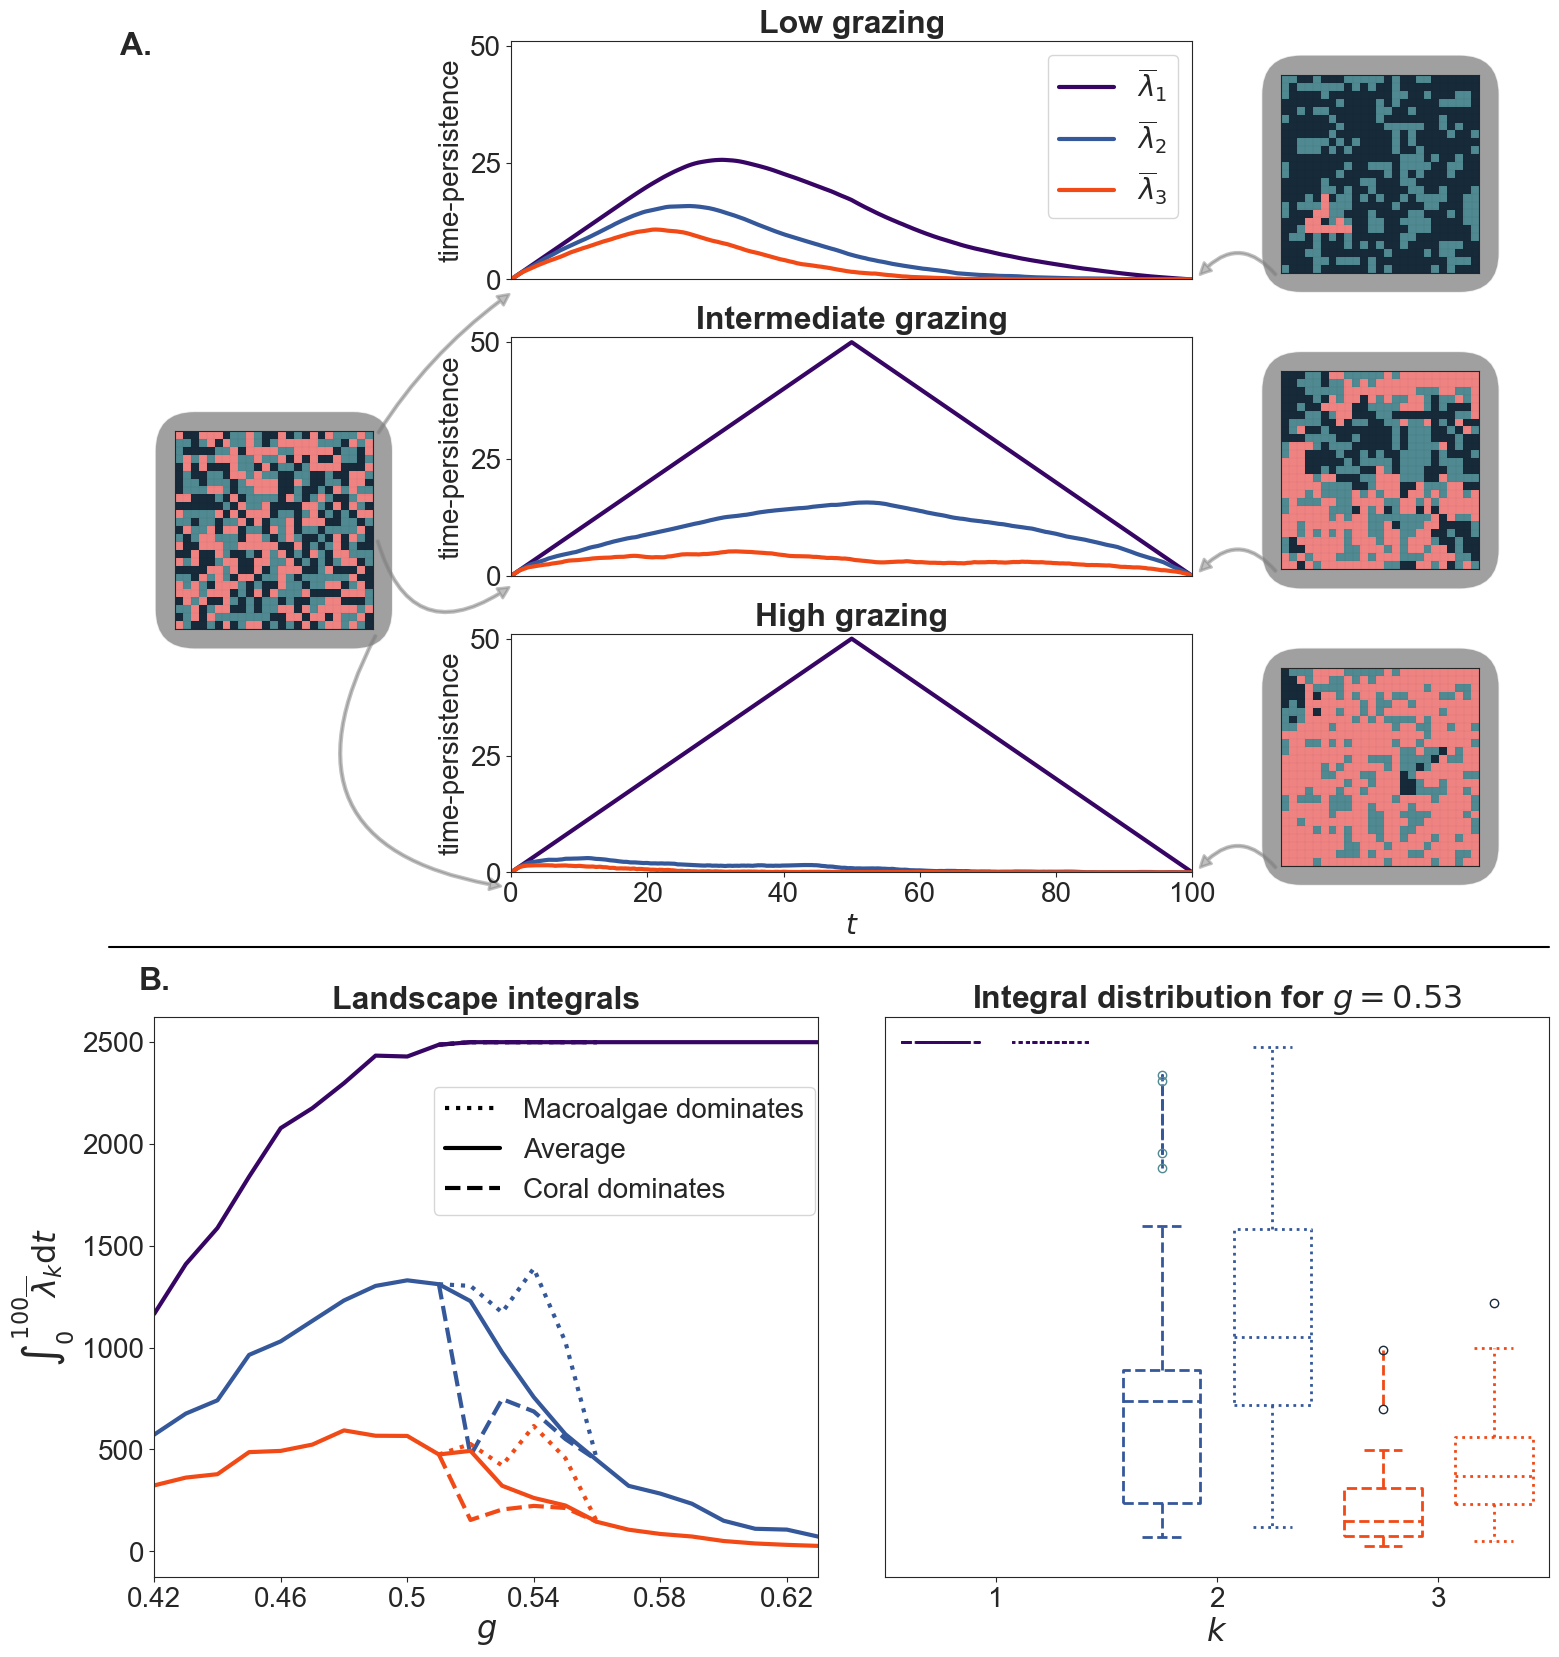

In [31]:
fig.savefig('./figures/paper/5_grazing_bifurcation/fig5.pdf',bbox_inches='tight')
fig